# Genetic Algorithm

In this project we are going to understand concepts of genetic algorithm which is a search-based optimization technique based on the principles of Genetics and Natural Selection.

Logic gates are used for building logical circuits.Sometimes building these circuits are challenging ;therefore,using genetic algorithm to find right circuit is concidered.The desired truth table is provided and the problem is confined to sequential circuits as first and second columns are the inputs of the first gate and the output of first gate and third column are inputs of second gate,etc.<br>
for instance,the circuit of 4 gates and 5 inputs can be like the following figure.

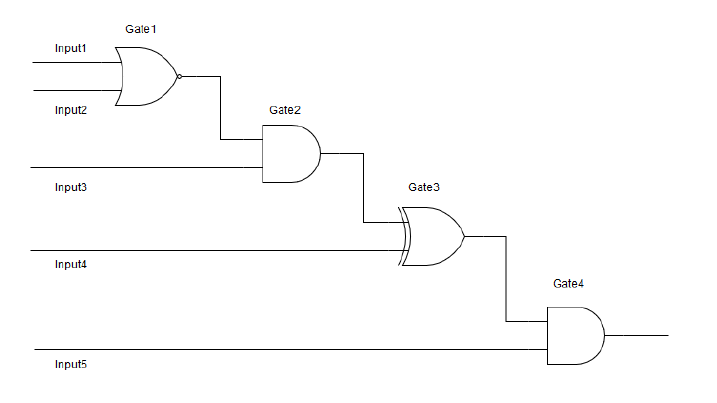

It is important to say that we are only going to use six main gates AND, OR, XOR, NAND, NOR, and XNOR.

We assign a number to each gate inorder to prevent confusion in the future

In [14]:
import numpy as np
import pandas as pd
import random

In [15]:
AND = 0
OR = 1
XOR = 2
NAND = 3
NOR = 4
XNOR =5

In [16]:
truth_table =pd.read_csv('truth_table.csv')
num_rows = len(truth_table)
columns = len(truth_table.columns)
num_inputs = columns-1    
OUT = truth_table['Output'].to_numpy()
Inputs ={}
for i in range(num_inputs):
    Inputs[i] = truth_table.iloc[:,i].to_numpy()


Above we are using the given truth table to intialize our variables which are going to be used in the training part.

In Genetic algorithm, we have a population of possible solutions to the given problem(population_initialization function). These solutions then undergo recombination(crossover functon) and mutation (mutation function), producing new children, and the process is repeated over various generations. Each individual is assigned a fitness value (fitness function) and the fitter individuals are given a higher chance to mate and yield more “fitter” individuals(selection function).

Phase 1:<br>
In this problem genes are 6 defined gates which each of them is given a number from 0 to 5 and chromosome is an array of these genes. Size of the array is number of inputs minus 1 because number of gates are one less than number of inputs. In the population_initialization function a random number is assigned to genes of chromosomes.<br>
Phase 2:<br>
Now a population of chromosomes must be initialized.Depending on the size of population,population_initialization function would generate chromosomes with random numbere assigned to their genes.<br>
Phase 3:<br>
It is time to find the right fitness function.The fitness value shows how many of the results are the same as desired output.In a 10 gate example, highest fintess is 1024 ,It is the exact right gate snd lowset is zero showing non are equall.In the fitness function,for each chromosome gate_result function is called.This function recursivelly calculates result of the chromosome in all inputs, finally, an array of true or false will be returned which then will be copared to desired output.Last step in fitness function is sorting and returning scores and chromosomes.<br>
Phase 4 :<br>
This step is creating new generation consisting of two main functions mutation and crossover.First, selection functon will return n highest score parents,then these parents' genes would combine and create a child by replacing their 3 middle values.Finally, randomly and according to mutation rate some of the genes might change in mutation function.


In [17]:
def gate_result(chromosome,input1,size):
    if size ==1:
        return input1
    gate = chromosome[num_inputs-size]
    input2 = Inputs[num_inputs-size+1]
    if gate==AND :
        return gate_result(chromosome,np.bitwise_and(input1,input2),size-1)
    elif gate ==OR:
        return gate_result(chromosome,np.bitwise_or(input1,input2),size-1)
    elif gate ==XOR:
        return gate_result(chromosome,np.bitwise_xor(input1,input2),size-1)
    elif gate == NAND:
        return gate_result(chromosome,np.bitwise_not(np.bitwise_and(input1, input2)),size-1)
    elif gate == NOR:
        return gate_result(chromosome,np.bitwise_not(np.bitwise_or(input1, input2)),size-1)
    elif gate == XNOR:
        return gate_result(chromosome,np.bitwise_not(np.bitwise_xor(input1, input2)),size-1)
    else:
        print(gate)
        raise ValueError('NOT DEFINED!')

In [22]:
def population_initialization(size):
    population =[]
    for i in range(size):
        chromosome = np.random.randint(low=0, high=6, size=num_inputs-1)
        population.append(chromosome)
    return population

def fitness(population):
    scores = []
    for chromosome in population:
        G9 = gate_result(chromosome,Inputs[0],num_inputs)        
        f = sum(np.bitwise_not(np.bitwise_xor(G9, OUT)))
        scores.append(f)
    scores,population = np.array(scores),np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])
    
def selection(population,n_parents):
    next_generation = []
    for i in range(n_parents):
        next_generation.append(population[i])
    return next_generation

def crossover(population):
    n=(num_inputs -1)//2
    next_generation = population
    for i in range(len(next_generation)):
        child = population[i]
        child[n-1:n+1] = population[(i+1)%len(population)][n-1:n+1]
        next_generation.append(child)
    return next_generation

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= random.randint(0,5)
        population_nextgen.append(chromosome)
    return population_nextgen

def generations(size,n_parents,mutation_rate):
    best_chromo= []
    best_score= []
    population_nextgen=population_initialization(size)
    while num_rows not in best_score:
        scores, pop_after_fit = fitness(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    print(best_chromo.pop())
    return best_chromo,best_score

In [24]:
chromo,score=generations(size=300,n_parents=150,mutation_rate=0.10)

[944, 928]
[954, 954]
[928, 928]
[928, 928]
[976, 976]
[994, 994]
[968, 968]
[984, 984]
[982, 982]
[994, 994]
[972, 972]
[960, 960]
[992, 992]
[992, 992]
[1004, 1004]
[1000, 1000]
[1014, 1014]
[1014, 1014]
[1012, 1012]
[1012, 1012]
[1012, 1012]
[1004, 1004]
[1004, 1004]
[1012, 1012]
[1004, 1004]
[994, 994]
[998, 998]
[1004, 1004]
[1004, 1004]
[1024, 1024]
[2 5 5 5 0 1 0 2 4]


In [25]:
chromo,score=generations(size=200,n_parents=100,mutation_rate=0.10)

[928, 912]
[960, 960]
[972, 972]
[968, 968]
[984, 984]
[936, 936]
[968, 968]
[992, 992]
[992, 992]
[996, 996]
[1004, 1004]
[1000, 1000]
[1008, 1008]
[1008, 1008]
[1008, 1008]
[1008, 1008]
[1008, 1008]
[998, 998]
[1008, 1008]
[1008, 1008]
[1002, 1002]
[992, 992]
[1008, 1008]
[1008, 1008]
[1012, 1012]
[1012, 1012]
[1012, 1012]
[994, 994]
[1012, 1012]
[1000, 1000]
[1002, 1002]
[990, 990]
[1004, 1004]
[1016, 1016]
[1008, 1008]
[1016, 1016]
[1004, 1004]
[1008, 1008]
[1008, 1008]
[1008, 1008]
[1002, 1002]
[1012, 1012]
[1008, 1008]
[1024, 1024]
[3 5 4 1 0 1 3 5 3]


Why this fitness function?<br>
This function shows me how close I am to want the result should be.I used this because I was not just looking for an acceptable circuit but I was looking for a comination of gates that return exact result that the table shows.<br>
Why selecting parents like that?
I colud calculate probability or rank to select parents.I prefered ranking them because rank selection overcomes the scaling problems, its easier to implement and I am using other technique to avoid local optimum.<br>
What is the impact of crossover and mutation?<br>
These two techniqus are used to create a new generation this way new chromosomes will be in population helping to get to optimum.
Mutation rate determines how many chromosomes should be mutated in one generation. The purpose of mutation is to prevent from converging to local optimum, but if it occurs very often, GA is changed to random search [1].Thus,nutation rate must not be so high I prefered 0.1 for this specific problem to avoid local optimum .I used multipoint crossover since first gates have higher impact on the result since their output is the input of remaining gates and more crossover can avoid stucking at local optimum.

There are some approaches to avoid local optimum.Fitness sharing, regeneration, higher rate for mutation,changing population size and selecting parents with low fitness.

Fitness sharing is a well-known diversity mechanism inspired by the idea that individuals in the population that are close to each other have to share their fitnesses in a similar way to how species in nature occupying the same ecological environment have to share resources. Thus, by derating the fitness of close individuals one hopes to encourage the population to spread out more.

Smaller population results in quicker convegence speed but it might trap in local optimum.Size of population is mostly calculated with tial.So I chose 200 populaton size which is neither high nor low.These approaches are like allowing bad move in hill climbing.50,100 and 300 population size were tried with 25,50 and 150 parents respectively.First two tests had many ups and down in best scores, last one had less ups and downs but it was slow. population of 200 ,however, get to desired result faster and with less ups and downs.(This result was get after several runs)

I disccused about prevent local optimum with mutation and crossover and their implemented already.More parents means more crossover and choosing half of the parents to operate those functions seems reasonable so 150 is selcted for this problem.

Last method is regenerating meaning that if the population reached a local optimum we can escape from the situation by adding some new chromosome randomondly.It is like using some start points in hill climbing.

References<br>
Hassanat, A., Almohammadi, K., Alkafaween, E., Abunawas, E., Hammouri, A. and Prasath, V., 2019. Choosing Mutation and Crossover Ratios for Genetic Algorithms—A Review with a New Dynamic Approach. Information, 10(12), p.390.